In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Regularization
from sklearn.linear_model import Ridge,Lasso
from sklearn.model_selection import train_test_split

In [17]:
# Load Datasets
data = fetch_california_housing(as_frame=True)

In [18]:
df = data.frame

In [19]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [20]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [21]:
# Select feature (median income) and target (median house value)
X = df[['MedInc']]
y = df[['MedHouseVal']]

In [22]:
# Transform feature to polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

In [15]:
# Split
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

In [23]:
# Ridge Regression
ridge_model = Ridge(alpha=1)
ridge_model.fit(X_train, y_train)
ridge_prediction = ridge_model.predict(X_test)

In [24]:
# Lasso Reg
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
lasso_prediction = lasso_model.predict(X_test)

In [25]:
# Evaluate
ridge_mse = mean_squared_error(y_test, ridge_prediction)
print(f"ridge regression mse: {ridge_mse}")

lasso_mse = mean_squared_error(y_test, lasso_prediction)
print(f"lasso regression mse: {lasso_mse}")

ridge regression mse: 0.703272792117919
lasso regression mse: 0.7211823140579732


In [ ]:
# # Fit polynomial regression model
# model = LinearRegression()
# model.fit(X_poly, y)

LinearRegression()

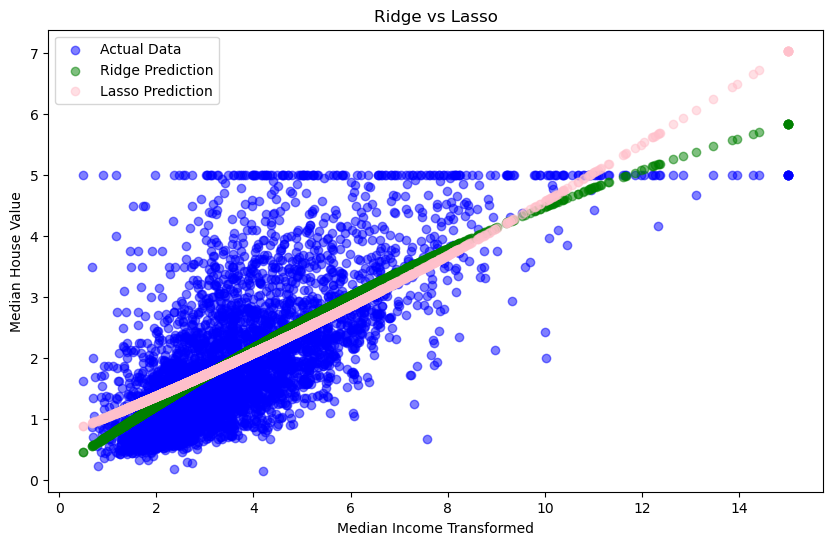

In [26]:
# Viasualisasi ridge vs lasso
plt.figure(figsize=(10,6))
plt.scatter(X_test[:, 0], y_test, color="blue", label="Actual Data", alpha=0.5)
plt.scatter(X_test[:, 0], ridge_prediction, color="green", label="Ridge Prediction", alpha=0.5)
plt.scatter(X_test[:, 0], lasso_prediction, color="pink", label="Lasso Prediction", alpha=0.5)
plt.title("Ridge vs Lasso")
plt.xlabel("Median Income Transformed")
plt.ylabel("Median House Value")
plt.legend()
plt.show()

In [11]:
# #Make prediction
# y_pred = model.predict(X_poly)

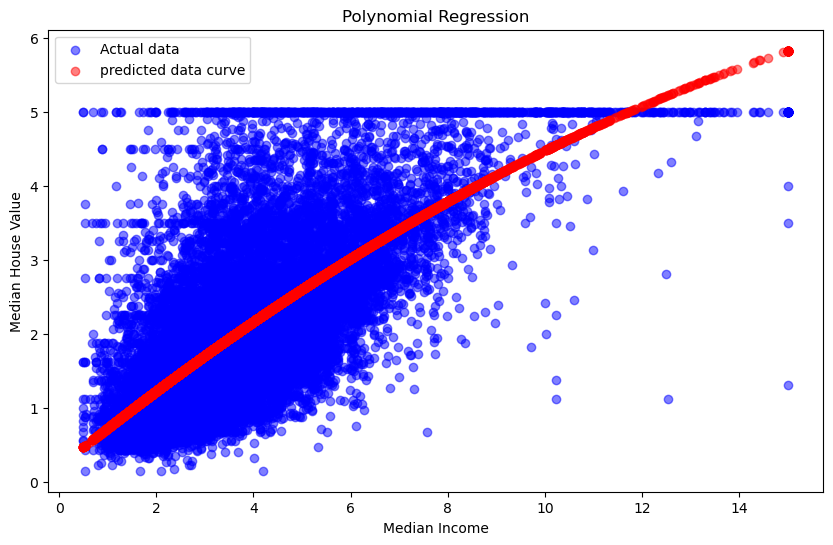

In [12]:
# # Plot actual vs predicted values
plt.figure(figsize=(10,6))
plt.scatter(X, y, color="blue", label="Actual data", alpha=0.5)
plt.scatter(X, y_pred, color="red", label="predicted data curve", alpha=0.5)
plt.title("Polynomial Regression")
plt.xlabel("Median Income")
plt.ylabel("Median House Value")
plt.legend()
plt.show()

In [13]:
# # Evaluate Model
# mse = mean_squared_error(y, y_pred)
# print(f"mse: {mse}")

mse: 0.6950372537239728
